
# Employee Salary Analytics Dashboard (SQL + Python)

In this project, I:

- Designed a MySQL database with three tables: `Departments`, `Employees`, and `Salaries`.
- Inserted 100 employees across 5 departments.
- Wrote SQL queries to analyze salaries, headcounts, and gender pay patterns.
- Used Python (pandas + matplotlib) to visualize key insights for the HR/analytics team.



In [2]:
# 1. Import the libraries we need
import mysql.connector       # To connect to MySQL
import pandas as pd          # To handle tables similar to Excel

# 2. Connect to your MySQL database
conn = mysql.connector.connect(
    host="localhost",              
    user="root",                   
    password="ashesh@2062",  
    database="employees_analytics" # The database we created earlier
)

print("✅ Connected to MySQL!")


✅ Connected to MySQL!


In [3]:
# Average salary by department

avg_salary_query = """
SELECT 
    d.DEPARTMENT_NAME,
    ROUND(AVG(s.SALARY), 2) AS AVG_SALARY
FROM Employees e
JOIN Departments d 
    ON e.DEPARTMENT_ID = d.DEPARTMENT_ID
JOIN Salaries s 
    ON e.EMPLOYEE_ID = s.EMPLOYEE_ID
GROUP BY d.DEPARTMENT_NAME
ORDER BY AVG_SALARY DESC;
"""

# Run the SQL query and load results into a pandas DataFrame
avg_salary_by_dept = pd.read_sql(avg_salary_query, conn)

# Show the table
avg_salary_by_dept


/var/folders/6l/2ddjd91x0ml_rpkq2n0v_7sc0000gn/T/ipykernel_27978/494123203.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_salary_by_dept = pd.read_sql(avg_salary_query, conn)


,DEPARTMENT_NAME,AVG_SALARY
0,ENGINEERING,85166.67
1,FINANCE,83500.00
2,HUMAN RESOURCES,82575.00
3,DATA SCIENCE,81210.53
4,ECONOMICS,80750.00


In [4]:
# 2️⃣ Top 10 highest paid employees

top10_query = """
SELECT 
    e.EMPLOYEE_FIRST_NAME,
    e.EMPLOYEE_LAST_NAME,
    s.SALARY
FROM Employees e
JOIN Salaries s
    ON e.EMPLOYEE_ID = s.EMPLOYEE_ID
ORDER BY s.SALARY DESC
LIMIT 10;
"""

top10_earners = pd.read_sql(top10_query, conn)
top10_earners


/var/folders/6l/2ddjd91x0ml_rpkq2n0v_7sc0000gn/T/ipykernel_27978/1931789192.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top10_earners = pd.read_sql(top10_query, conn)


,EMPLOYEE_FIRST_NAME,EMPLOYEE_LAST_NAME,SALARY
0,Elijah,Davis,102000.0
1,Harper,Clark,100000.0
2,ASHESH,BHATTARAI,100000.0
3,Skylar,Harvey,99000.0
4,Chloe,Roberts,99000.0
5,Natalie,Brooks,99000.0
6,Sofia,Wright,98500.0
7,Evelyn,Lewis,97000.0
8,Nora,Murphy,96500.0
9,Claire,Alexander,95500.0


In [5]:
# 3️⃣ Number of employees in each department

emp_count_query = """
SELECT 
    d.DEPARTMENT_NAME,
    COUNT(*) AS TOTAL_NUMBER_OF_EMPLOYEES
FROM Employees e
JOIN Departments d
    ON e.DEPARTMENT_ID = d.DEPARTMENT_ID
GROUP BY d.DEPARTMENT_NAME
ORDER BY TOTAL_NUMBER_OF_EMPLOYEES DESC;
"""

employees_per_dept = pd.read_sql(emp_count_query, conn)
employees_per_dept


/var/folders/6l/2ddjd91x0ml_rpkq2n0v_7sc0000gn/T/ipykernel_27978/2292864036.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employees_per_dept = pd.read_sql(emp_count_query, conn)


,DEPARTMENT_NAME,TOTAL_NUMBER_OF_EMPLOYEES
0,ENGINEERING,21
1,FINANCE,20
2,ECONOMICS,20
3,HUMAN RESOURCES,20
4,DATA SCIENCE,19


In [6]:
# 4️⃣ Average salary by gender

gender_pay_query = """
SELECT 
    e.GENDER,
    ROUND(AVG(s.SALARY), 2) AS AVG_SALARY
FROM Employees e 
JOIN Salaries s 
    ON e.EMPLOYEE_ID = s.EMPLOYEE_ID
GROUP BY e.GENDER;
"""

avg_salary_by_gender = pd.read_sql(gender_pay_query, conn)
avg_salary_by_gender


/var/folders/6l/2ddjd91x0ml_rpkq2n0v_7sc0000gn/T/ipykernel_27978/4294044057.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_salary_by_gender = pd.read_sql(gender_pay_query, conn)


,GENDER,AVG_SALARY
0,MALE,81460.78
1,FEMALE,83948.98


In [7]:
# 5️⃣ Salary distribution: min, max, average

salary_dist_query = """
SELECT 
    MIN(s.SALARY) AS MIN_SALARY,
    MAX(s.SALARY) AS MAX_SALARY,
    ROUND(AVG(s.SALARY), 2) AS AVG_SALARY
FROM Salaries s;
"""

salary_distribution = pd.read_sql(salary_dist_query, conn)
salary_distribution


/var/folders/6l/2ddjd91x0ml_rpkq2n0v_7sc0000gn/T/ipykernel_27978/3325342987.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_distribution = pd.read_sql(salary_dist_query, conn)


,MIN_SALARY,MAX_SALARY,AVG_SALARY
0,66000.0,102000.0,82680.0


In [8]:
# 6️⃣ Highest paid employee in each department

highest_per_dept_query = """
SELECT 
    d.DEPARTMENT_NAME,
    e.EMPLOYEE_FIRST_NAME,
    e.EMPLOYEE_LAST_NAME,
    s.SALARY
FROM Employees e
JOIN Salaries s
    ON e.EMPLOYEE_ID = s.EMPLOYEE_ID
JOIN Departments d 
    ON e.DEPARTMENT_ID = d.DEPARTMENT_ID
WHERE (d.DEPARTMENT_ID, s.SALARY) IN (
    SELECT DEPARTMENT_ID, MAX(SALARY)
    FROM Employees e2
    JOIN Salaries s2 ON e2.EMPLOYEE_ID = s2.EMPLOYEE_ID
    GROUP BY DEPARTMENT_ID
);
"""

highest_paid_each_dept = pd.read_sql(highest_per_dept_query, conn)
highest_paid_each_dept


/var/folders/6l/2ddjd91x0ml_rpkq2n0v_7sc0000gn/T/ipykernel_27978/1713396226.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  highest_paid_each_dept = pd.read_sql(highest_per_dept_query, conn)


,DEPARTMENT_NAME,EMPLOYEE_FIRST_NAME,EMPLOYEE_LAST_NAME,SALARY
0,DATA SCIENCE,Evelyn,Lewis,97000.0
1,ENGINEERING,Elijah,Davis,102000.0
2,FINANCE,ASHESH,BHATTARAI,100000.0
3,FINANCE,Harper,Clark,100000.0
4,ECONOMICS,Sophia,Taylor,94000.0
5,ECONOMICS,Victoria,Baker,94000.0
6,HUMAN RESOURCES,Sofia,Wright,98500.0


In [9]:
# 7️⃣ Average salary by gender in each department

dept_gender_pay_query = """
SELECT 
    d.DEPARTMENT_NAME,
    e.GENDER,
    ROUND(AVG(s.SALARY), 2) AS AVG_SALARY
FROM Employees e
JOIN Salaries s 
    ON e.EMPLOYEE_ID = s.EMPLOYEE_ID
JOIN Departments d 
    ON e.DEPARTMENT_ID = d.DEPARTMENT_ID
GROUP BY d.DEPARTMENT_NAME, e.GENDER
ORDER BY d.DEPARTMENT_NAME, e.GENDER;
"""

avg_salary_gender_dept = pd.read_sql(dept_gender_pay_query, conn)
avg_salary_gender_dept


/var/folders/6l/2ddjd91x0ml_rpkq2n0v_7sc0000gn/T/ipykernel_27978/1692244523.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_salary_gender_dept = pd.read_sql(dept_gender_pay_query, conn)


,DEPARTMENT_NAME,GENDER,AVG_SALARY
0,DATA SCIENCE,MALE,78400.00
1,DATA SCIENCE,FEMALE,84333.33
2,ECONOMICS,MALE,78000.00
3,ECONOMICS,FEMALE,83000.00
4,ENGINEERING,MALE,85192.31
5,ENGINEERING,FEMALE,85125.00
6,FINANCE,MALE,80950.00
7,FINANCE,FEMALE,86050.00
8,HUMAN RESOURCES,MALE,83500.00
9,HUMAN RESOURCES,FEMALE,81818.18


In [10]:
conn.close()
print("Connection closed.")


Connection closed.


In [11]:
!pip install matplotlib


zsh:1: command not found: pip


In [12]:
!pip3 install matplotlib



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


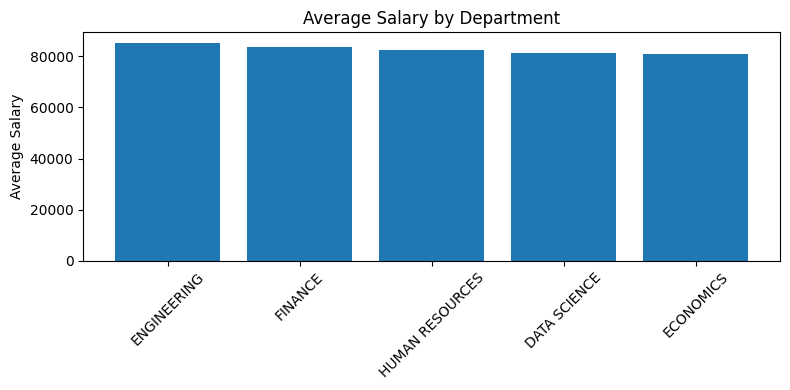

In [13]:
import matplotlib.pyplot as plt

# 1. Bar chart of average salary by department
plt.figure(figsize=(8, 4))  # make the chart wider

plt.bar(
    avg_salary_by_dept["DEPARTMENT_NAME"],   # X-axis: department names
    avg_salary_by_dept["AVG_SALARY"]         # Y-axis: average salary
)

plt.xticks(rotation=45)           # tilt labels so they don't overlap
plt.ylabel("Average Salary")
plt.title("Average Salary by Department")
plt.tight_layout()                # adjust layout so text fits
plt.show()


### Insight: Average Salary by Department

- Engineering has the highest average salary (~85k), followed by Finance and Human Resources.
- Economics and Data Science have slightly lower averages in this sample.
- This might suggest that Engineering roles in this fake company are paid at a premium compared to others.


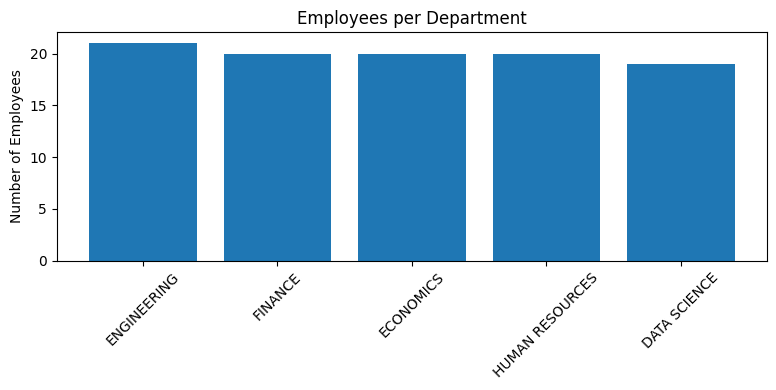

In [14]:
# 2. Bar chart of number of employees in each department

plt.figure(figsize=(8, 4))

plt.bar(
    employees_per_dept["DEPARTMENT_NAME"],           # X-axis
    employees_per_dept["TOTAL_NUMBER_OF_EMPLOYEES"]  # Y-axis
)

plt.xticks(rotation=45)
plt.ylabel("Number of Employees")
plt.title("Employees per Department")
plt.tight_layout()
plt.show()


### Insight: Average Salary by Gender

- The difference between male, female, and other categories here comes from random data.
- In a real company, this kind of chart would help check for potential pay gaps.


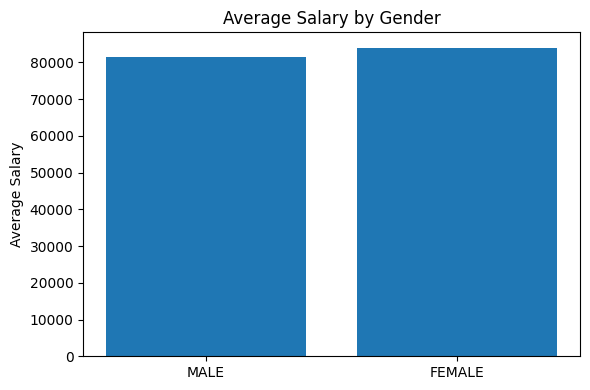

In [15]:
# 3. Bar chart of average salary by gender

plt.figure(figsize=(6, 4))

plt.bar(
    avg_salary_by_gender["GENDER"],
    avg_salary_by_gender["AVG_SALARY"]
)

plt.ylabel("Average Salary")
plt.title("Average Salary by Gender")
plt.tight_layout()
plt.show()


### Insight: Average Salary by Gender

- The difference between male, female, and other categories here comes from random data.
- In a real company, this kind of chart would help check for potential pay gaps.


## Conclusion

This mini analytics project shows how SQL and Python can work together:

- SQL handles data storage and complex joins.
- Python (pandas) makes it easy to analyze and visualize the results.
- The same pattern can be used for real HR/employee datasets to support decisions about hiring, promotions, and compensation.

Next steps (future improvements):
- Add time-series salary changes over years.
- Build an interactive dashboard (e.g., with Streamlit or Power BI).
- Connect to a real dataset instead of synthetic data.
